In [ ]:
# STEP 0: Load Dataset (Colab and Local)
import pandas as pd
import os

# File name (rename the file)
file_name = "heart_data.xlsx"

# If running locally (file in same folder as notebook)
if os.path.exists(file_name):
    df = pd.read_excel(file_name)

else:
    # If running on Colab, upload manually
    from google.colab import files
    import io
    print("File not found locally. Please upload the dataset...")
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df = pd.read_excel(io.BytesIO(uploaded[file_name]))


File not found locally. Please upload the dataset...


Saving Heart_disease_data_cleaned (1) (1).xlsx to Heart_disease_data_cleaned (1) (1).xlsx
Shape: (1534, 16)


,SEX,AGE,HEIGHT (m),WEIGHT (kg),TOTAL CHOLESTROL (mg/dL),HDL (mg/Dl),LDL (mg/Dl),BLOOD PRESSURE (mmHg),SYSTOLIC BLOOD PRESSURE (mmHg),DIASTOLIC BLOOD PRESSUE (mmHg),SMOKING,ALCOHOL (Y/N),BMI,PULSE PRESSURE (mmHg),RISK SCORE,RISK CATEGORY
0,M,53,171.5,47.3,232.2,69.9,137.2,86/70,86.5,70.3,N,N,16.1,16.2,1,Low
1,F,49,151.5,48.9,204.4,40.0,127.8,92/58,92.7,58.3,N,N,21.3,34.4,0,Low
2,F,39,152.7,63.7,256.6,68.4,136.4,118/84,118.1,84.7,N,N,27.3,33.3,1,Low
3,F,28,160.6,66.0,189.7,63.1,83.5,105/71,105.7,71.8,N,N,25.6,34.0,0,Low
4,M,52,178.4,62.7,231.4,57.8,142.9,123/70,123.8,70.4,Y,Y,19.7,53.4,3,Medium


In [ ]:
# Train and test split

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Check available columns
print("Columns in dataset:", df.columns.tolist())

# Use correct column names for targets (adjust if dataset uses different labels)
target_reg = "risk_score" if "risk_score" in df.columns else df.columns[-2]
target_cls = "risk_category" if "risk_category" in df.columns else df.columns[-1]

print(f"Using '{target_reg}' for regression target")
print(f"Using '{target_cls}' for classification target")

# Prepare features & targets
X = df.drop(columns=[target_reg, target_cls])
y_score = df[target_reg]      # regression target
y_cat = df[target_cls]        # classification target

# Train-test split
X_train, X_test, y_score_train, y_score_test, y_cat_train, y_cat_test = train_test_split(
    X, y_score, y_cat, test_size=0.2, random_state=42
)

# Define preprocessing
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)



Columns in dataset: ['SEX', 'AGE', 'HEIGHT (m)', 'WEIGHT (kg)', 'TOTAL CHOLESTROL (mg/dL)', 'HDL (mg/Dl)', 'LDL (mg/Dl)', 'BLOOD PRESSURE (mmHg)', 'SYSTOLIC BLOOD PRESSURE (mmHg)', 'DIASTOLIC BLOOD PRESSUE (mmHg)', 'SMOKING', 'ALCOHOL (Y/N)', 'BMI', 'PULSE PRESSURE (mmHg)', 'RISK SCORE', 'RISK CATEGORY ']
Using 'RISK SCORE' for regression target
Using 'RISK CATEGORY ' for classification target


In [ ]:
# Step 1: Baseline Models (Linear & Logistic Regression)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_squared_error
from math import sqrt
# Regression (Linear Regression)
lin_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

lin_reg.fit(X_train, y_score_train)
y_score_pred = lin_reg.predict(X_test)

print("\nLinear Regression Performance:")
print("R² Score:", r2_score(y_score_test, y_score_pred))
print("RMSE:", sqrt(mean_squared_error(y_score_test, y_score_pred)))

# Classification (Logistic Regression)
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_cat_train)
y_cat_pred = log_reg.predict(X_test)

print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_cat_test, y_cat_pred))
print(classification_report(y_cat_test, y_cat_pred))


Linear Regression Performance:
R² Score: -0.12012344011215959
RMSE: 1.573740076559925

Logistic Regression Performance:
Accuracy: 0.8436482084690554
              precision    recall  f1-score   support

        High       0.95      0.77      0.85        26
         Low       0.90      0.93      0.91       243
      Medium       0.38      0.34      0.36        38

    accuracy                           0.84       307
   macro avg       0.74      0.68      0.71       307
weighted avg       0.84      0.84      0.84       307



In [ ]:
# Evaluation metrices - Step 1
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# X_test must be the original DataFrame with the same columns as X_train
# Do not use preprocessed or resampled arrays for prediction

y_cat_pred = log_reg.predict(X_test)

print('Logistic Regression Accuracy:', accuracy_score(y_cat_test, y_cat_pred))
print('Classification Report:\n', classification_report(y_cat_test, y_cat_pred))



Logistic Regression Accuracy: 0.8436482084690554
Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.77      0.85        26
         Low       0.90      0.93      0.91       243
      Medium       0.38      0.34      0.36        38

    accuracy                           0.84       307
   macro avg       0.74      0.68      0.71       307
weighted avg       0.84      0.84      0.84       307



Confusion Matrix:
 [[ 20   2   4]
 [  0 226  17]
 [  1  24  13]]


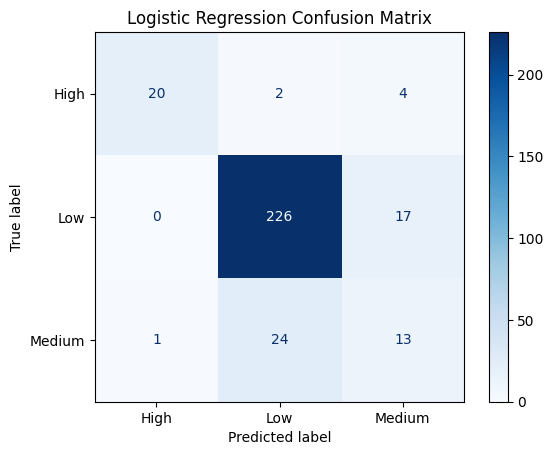

Logistic Regression Accuracy: 0.8436482084690554
Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.77      0.85        26
         Low       0.90      0.93      0.91       243
      Medium       0.38      0.34      0.36        38

    accuracy                           0.84       307
   macro avg       0.74      0.68      0.71       307
weighted avg       0.84      0.84      0.84       307



In [ ]:
#Step 1-Accuracy Matrix + Summary Plots
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, r2_score, mean_squared_error
import numpy as np
# Predict on test set
y_cat_pred = log_reg.predict(X_test)
print('Confusion Matrix:\n', confusion_matrix(y_cat_test, y_cat_pred))
# Confusion Matrix
cm_log = confusion_matrix(y_cat_test, y_cat_pred, labels=log_reg.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_reg.classes_)
disp_log.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Print metrics
print('Logistic Regression Accuracy:', accuracy_score(y_cat_test, y_cat_pred))
print('Classification Report:\n', classification_report(y_cat_test, y_cat_pred))

In [ ]:
# Step 2: Advanced Models (Random Forest)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_squared_error
from math import sqrt

# Regression (Random Forest Regressor)
rf_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),  # reuse preprocessing from Step 1
    ("model", RandomForestRegressor(random_state=42, n_estimators=100))
])

rf_reg.fit(X_train, y_score_train)
y_score_pred_rf = rf_reg.predict(X_test)

print("\nRandom Forest Regression Performance:")
print("R² Score:", r2_score(y_score_test, y_score_pred_rf))
print("RMSE:", sqrt(mean_squared_error(y_score_test, y_score_pred_rf)))

# Classification (Random Forest Classifier)
rf_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42, n_estimators=100))
])

rf_clf.fit(X_train, y_cat_train)
y_cat_pred_rf = rf_clf.predict(X_test)

print("\nRandom Forest Classification Performance:")
print("Accuracy:", accuracy_score(y_cat_test, y_cat_pred_rf))
print(classification_report(y_cat_test, y_cat_pred_rf))



Random Forest Regression Performance:
R² Score: 0.9308341772637843
RMSE: 0.39106219670764786

Random Forest Classification Performance:
Accuracy: 0.8794788273615635
              precision    recall  f1-score   support

        High       1.00      0.81      0.89        26
         Low       0.88      0.98      0.93       243
      Medium       0.67      0.26      0.38        38

    accuracy                           0.88       307
   macro avg       0.85      0.68      0.73       307
weighted avg       0.87      0.88      0.86       307



In [ ]:
#Step-2 Evaluation metrices (Random Forest Regression)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

y_score_pred_rf = rf_reg.predict(X_test)
print("Random Forest Regression Performance:")
print("R² Score:", r2_score(y_score_test, y_score_pred_rf))
print("RMSE:", sqrt(mean_squared_error(y_score_test, y_score_pred_rf)))
print("MAE:", mean_absolute_error(y_score_test, y_score_pred_rf))


Random Forest Regression Performance:
R² Score: 0.9308341772637843
RMSE: 0.39106219670764786
MAE: 0.23107491856677523


In [ ]:
#Step-2 Evaluation metrices (Random Forest Classification)
from sklearn.metrics import accuracy_score, classification_report

y_cat_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classification Performance:")
print("Accuracy:", accuracy_score(y_cat_test, y_cat_pred_rf))
print(classification_report(y_cat_test, y_cat_pred_rf))




Random Forest Classification Performance:
Accuracy: 0.8794788273615635
              precision    recall  f1-score   support

        High       1.00      0.81      0.89        26
         Low       0.88      0.98      0.93       243
      Medium       0.67      0.26      0.38        38

    accuracy                           0.88       307
   macro avg       0.85      0.68      0.73       307
weighted avg       0.87      0.88      0.86       307



Confusion Matrix (Accuracy Matrix):
 [[ 21   4   1]
 [  0 239   4]
 [  0  28  10]]
Accuracy: 0.8794788273615635


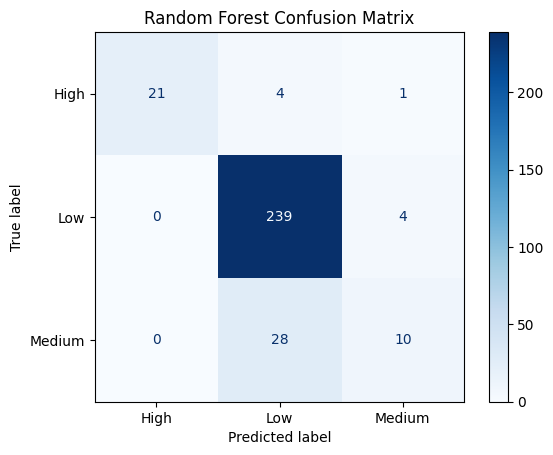

In [ ]:
#Step 2-Accuracy Matrix + Summary Plots
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Predict on the test set
y_cat_pred_rf = rf_clf.predict(X_test)

# Compute the confusion matrix (accuracy matrix)
cm = confusion_matrix(y_cat_test, y_cat_pred_rf)
print("Confusion Matrix (Accuracy Matrix):\n", cm)

# print overall accuracy
print("Accuracy:", accuracy_score(y_cat_test, y_cat_pred_rf))

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_).plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [ ]:
# Step 3: Comparison of All Models

import pandas as pd

# Collect metrics
results = {
    "Model": ["Linear Regression", "Random Forest Regressor",
              "Logistic Regression", "Random Forest Classifier"],

    "Task": ["Regression", "Regression", "Classification", "Classification"],

    "R² / Accuracy": [
        r2_score(y_score_test, y_score_pred),         # Linear Regression R²
        r2_score(y_score_test, y_score_pred_rf),      # RF Regression R²
        accuracy_score(y_cat_test, y_cat_pred),       # Logistic Regression Accuracy
        accuracy_score(y_cat_test, y_cat_pred_rf)     # RF Classification Accuracy
    ],

    "RMSE / F1-score": [
        sqrt(mean_squared_error(y_score_test, y_score_pred)),   # Linear Regression RMSE
        sqrt(mean_squared_error(y_score_test, y_score_pred_rf)),# RF Regression RMSE
        classification_report(y_cat_test, y_cat_pred, output_dict=True)["weighted avg"]["f1-score"], # Logistic F1
        classification_report(y_cat_test, y_cat_pred_rf, output_dict=True)["weighted avg"]["f1-score"] # RF F1
    ]
}

# Convert to DataFrame for neat display
comparison_df = pd.DataFrame(results)
print("\n--- Model Comparison ---")
print(comparison_df)




--- Model Comparison ---
                      Model            Task  R² / Accuracy  RMSE / F1-score
0         Linear Regression      Regression      -0.120123         1.573740
1   Random Forest Regressor      Regression       0.930834         0.391062
2       Logistic Regression  Classification       0.843648         0.839547
3  Random Forest Classifier  Classification       0.879479         0.858483


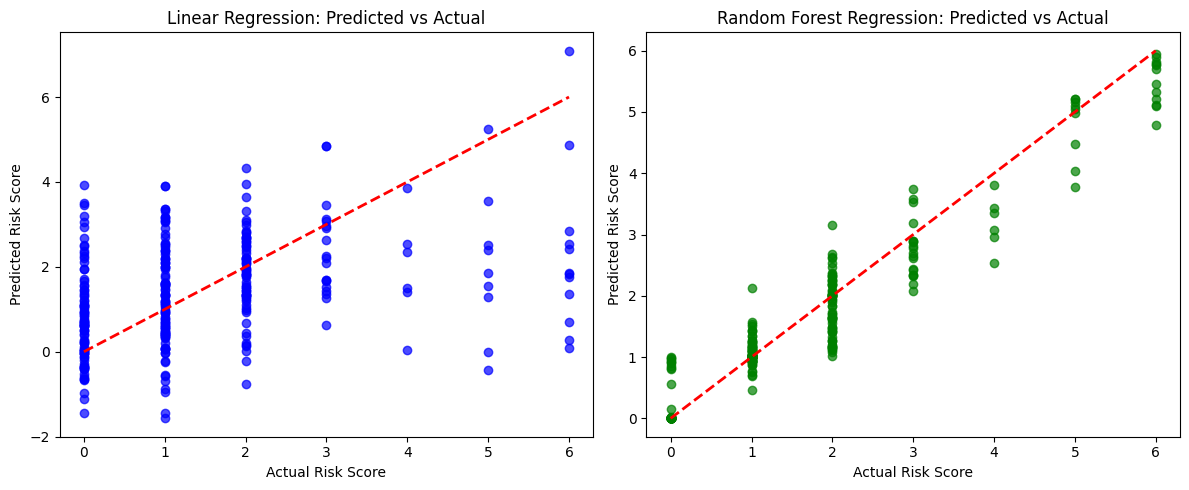

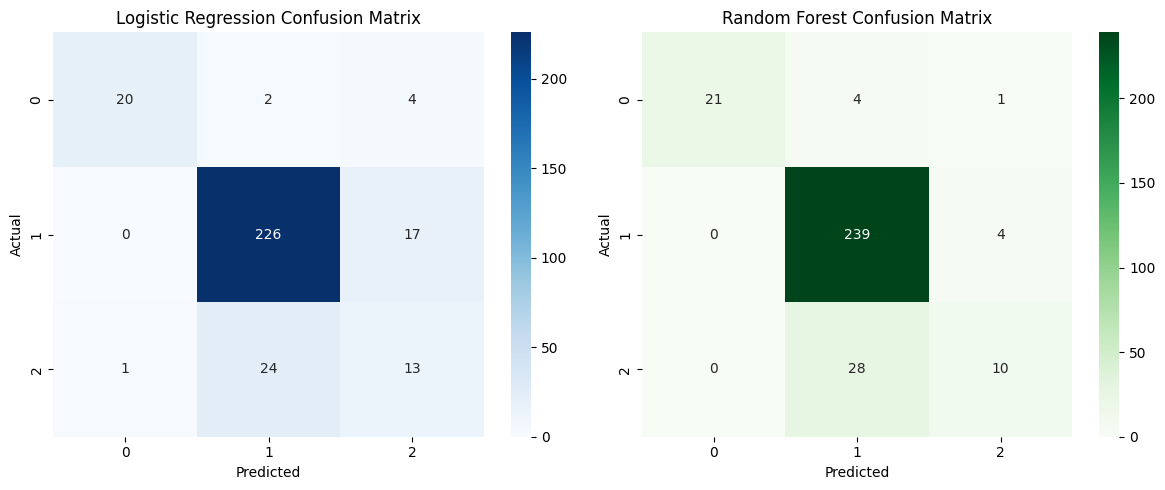

In [ ]:
# Step 4: Visualization of Predicted vs Actual Plots

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Regression: Predicted vs Actual Plots
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_score_test, y_score_pred, alpha=0.7, color='blue')
plt.plot([y_score_test.min(), y_score_test.max()],
         [y_score_test.min(), y_score_test.max()],
         'r--', lw=2)
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Risk Score')
plt.ylabel('Predicted Risk Score')

# Random Forest Regression
plt.subplot(1, 2, 2)
plt.scatter(y_score_test, y_score_pred_rf, alpha=0.7, color='green')
plt.plot([y_score_test.min(), y_score_test.max()],
         [y_score_test.min(), y_score_test.max()],
         'r--', lw=2)
plt.title('Random Forest Regression: Predicted vs Actual')
plt.xlabel('Actual Risk Score')
plt.ylabel('Predicted Risk Score')

plt.tight_layout()
plt.show()


# Classification: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression
cm_log = confusion_matrix(y_cat_test, y_cat_pred)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest Classification
cm_rf = confusion_matrix(y_cat_test, y_cat_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()




In [ ]:

import pandas as pd

# Example: Replace these values with new input (patient)
new_data = pd.DataFrame({
    'SEX': ['M'],
    'AGE': [55],
    'HEIGHT (m)': [170.0],
    'WEIGHT (kg)': [72.0],
    'TOTAL CHOLESTROL (mg/dL)': [210.0],
    'HDL (mg/Dl)': [50.0],
    'LDL (mg/Dl)': [130.0],
    'BLOOD PRESSURE (mmHg)': ['120/80'],
    'SYSTOLIC BLOOD PRESSURE (mmHg)': [120.0],
    'DIASTOLIC BLOOD PRESSUE (mmHg)': [80.0],
    'SMOKING': ['N'],
    'ALCOHOL (Y/N)': ['N'],
    'BMI': [24.9],
    'PULSE PRESSURE (mmHg)': [40.0]
})


In [ ]:
# For classification (risk category)
predicted_category = rf_clf.predict(new_data)
print('Predicted risk category:', predicted_category[0])

# For regression (risk score)
predicted_score = rf_reg.predict(new_data)
print('Predicted risk score:', predicted_score[0])


Predicted risk category: Low
Predicted risk score: 1.0
